In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings

warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

pd.set_option('display.max_columns', 30)

In [2]:
df = pd.read_csv('kidney_disease.csv')

In [3]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.shape

(400, 26)

In [5]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [6]:
df['id']

0        0
1        1
2        2
3        3
4        4
      ... 
395    395
396    396
397    397
398    398
399    399
Name: id, Length: 400, dtype: int64

In [7]:
df.drop('id', axis=1, inplace=True)

In [8]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


In [9]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [10]:
df

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [12]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')

In [13]:
df['packed_cell_volume']

0      44.0
1      38.0
2      31.0
3      32.0
4      35.0
       ... 
395    47.0
396    54.0
397    49.0
398    51.0
399    53.0
Name: packed_cell_volume, Length: 400, dtype: float64

In [14]:
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')

In [15]:
df['white_blood_cell_count']

0      7800.0
1      6000.0
2      7500.0
3      6700.0
4      7300.0
        ...  
395    6700.0
396    7800.0
397    6600.0
398    7200.0
399    6800.0
Name: white_blood_cell_count, Length: 400, dtype: float64

In [16]:
df['white_blood_cell_count'] = df['white_blood_cell_count'].astype(int, errors='ignore')

In [17]:
df['white_blood_cell_count']

0      7800.0
1      6000.0
2      7500.0
3      6700.0
4      7300.0
        ...  
395    6700.0
396    7800.0
397    6600.0
398    7200.0
399    6800.0
Name: white_blood_cell_count, Length: 400, dtype: float64

In [18]:
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [19]:
df['red_blood_cell_count']

0      5.2
1      NaN
2      NaN
3      3.9
4      4.6
      ... 
395    4.9
396    6.2
397    5.4
398    5.9
399    6.1
Name: red_blood_cell_count, Length: 400, dtype: float64

In [20]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [21]:
num_cols

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [22]:
cat_cols

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [23]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values.\n")

red_blood_cells has [nan 'normal' 'abnormal'] values.

pus_cell has ['normal' 'abnormal' nan] values.

pus_cell_clumps has ['notpresent' 'present' nan] values.

bacteria has ['notpresent' 'present' nan] values.

hypertension has ['yes' 'no' nan] values.

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values.

coronary_artery_disease has ['no' 'yes' '\tno' nan] values.

appetite has ['good' 'poor' nan] values.

peda_edema has ['no' 'yes' nan] values.

aanemia has ['no' 'yes' nan] values.

class has ['ckd' 'ckd\t' 'notckd'] values.



In [24]:
df['diabetes_mellitus'].replace(to_replace={'\tno': 'no', '\tyes': 'yes', ' yes': 'yes'}, inplace=True)

In [25]:
df['coronary_artery_disease'].replace(to_replace={'\tno': 'no'}, inplace=True)

In [26]:
df['coronary_artery_disease']

0      no
1      no
2      no
3      no
4      no
       ..
395    no
396    no
397    no
398    no
399    no
Name: coronary_artery_disease, Length: 400, dtype: object

In [27]:
df['class'].replace(to_replace={'ckd\t': 'ckd', 'notckd': 'not ckd'}, inplace=True)

In [28]:
df['class'].unique()

array(['ckd', 'not ckd'], dtype=object)

In [29]:
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})

In [30]:
df['class']

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int64

In [31]:
df['age']

0      48.0
1       7.0
2      62.0
3      48.0
4      51.0
       ... 
395    55.0
396    42.0
397    12.0
398    17.0
399    58.0
Name: age, Length: 400, dtype: float64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [33]:
df.isna().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

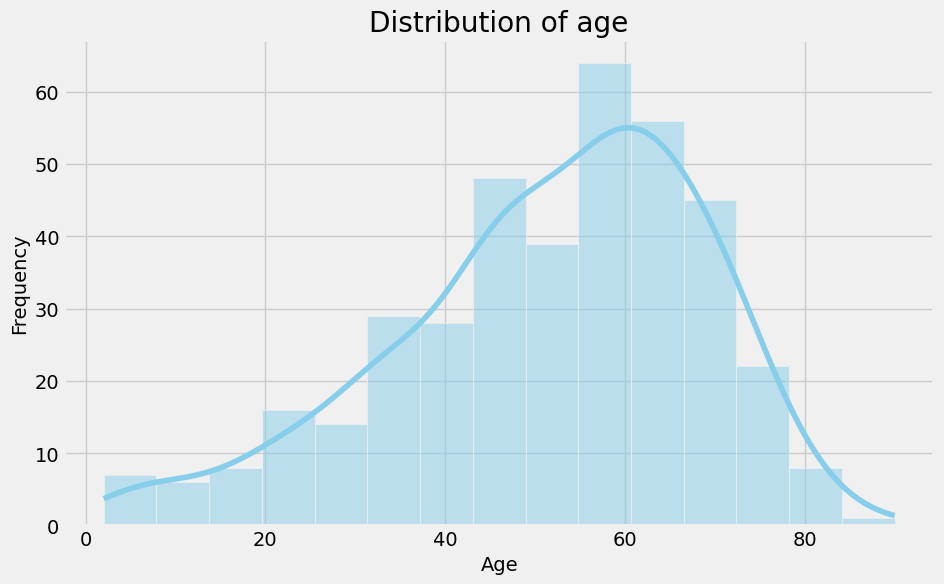

In [34]:
# Univariate analysis

plt.figure(figsize = (10, 6))
sns.histplot(df['age'].dropna(), kde=True, color='skyblue')
plt.title('Distribution of age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [35]:
# Insights

# The mean age is around  50
# Most of the people are around 40-60
# 70-80 low no of people

In [36]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [37]:
df['hypertension']

0      yes
1       no
2       no
3      yes
4       no
      ... 
395     no
396     no
397     no
398     no
399     no
Name: hypertension, Length: 400, dtype: object

In [38]:
df_temp = df[df['class'] == 0]

In [39]:
df_temp['hypertension'].value_counts()

yes    147
no     103
Name: hypertension, dtype: int64

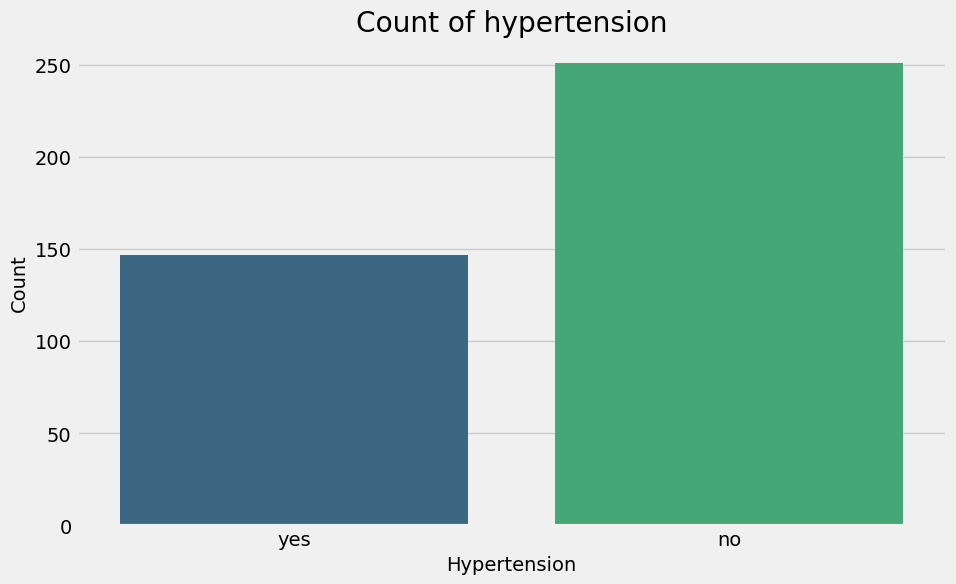

In [40]:
# How many people having cronic disease has hypertension

plt.figure(figsize=(10, 6))
sns.countplot(x='hypertension', data=df, palette='viridis')
plt.title('Count of hypertension')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.show()

In [41]:
# 150 have hypertension

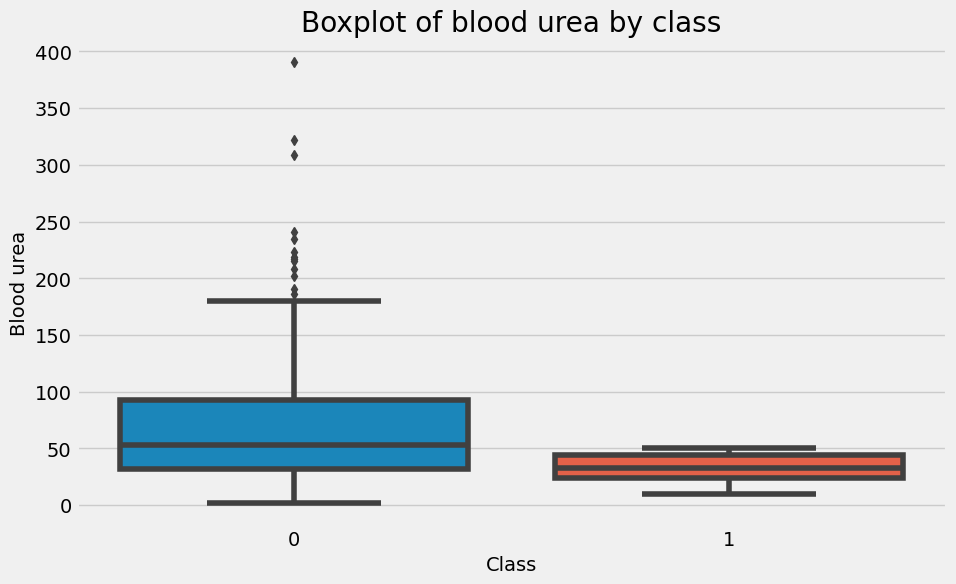

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='blood_urea', data=df)
plt.xlabel('Class')
plt.ylabel('Blood urea')
plt.title('Boxplot of blood urea by class')
plt.show()

In [43]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

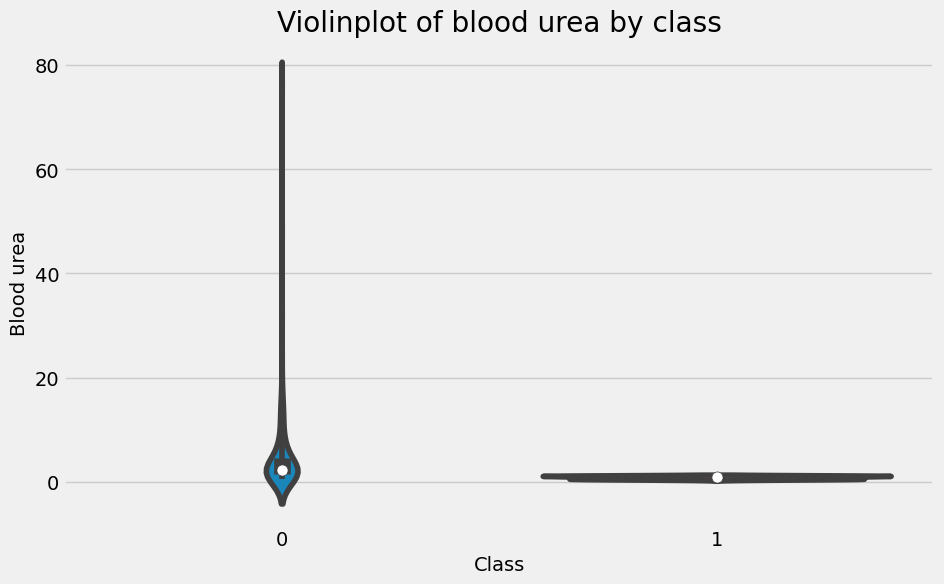

In [44]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='class', y='serum_creatinine', data=df)
plt.xlabel('Class')
plt.ylabel('Blood urea')
plt.title('Violinplot of blood urea by class')
plt.show()

In [45]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

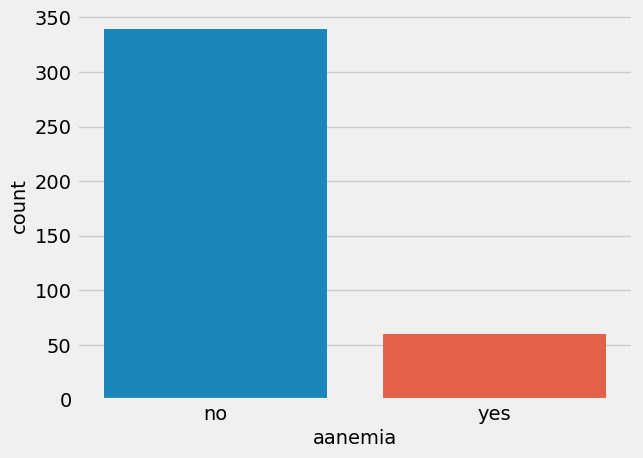

In [46]:
sns.countplot(x='aanemia', data=df)
plt.show()

In [47]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [48]:
df['appetite']

0      good
1      good
2      poor
3      poor
4      good
       ... 
395    good
396    good
397    good
398    good
399    good
Name: appetite, Length: 400, dtype: object

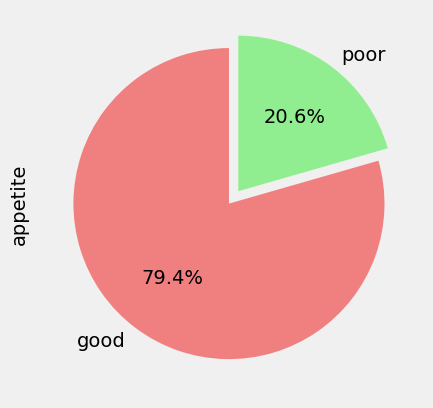

In [49]:
df['appetite'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'], explode=(0, 0.1), startangle=90)
plt.show()

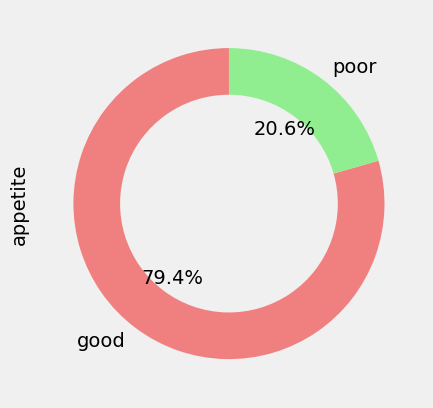

In [50]:
# 79.4% has good appetite

df['appetite'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'], wedgeprops=dict(width=0.3), startangle=90)
plt.show()

In [51]:
# If we want to analyse - how many people having cronic disease and hypertension with poor appetite?

In [52]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

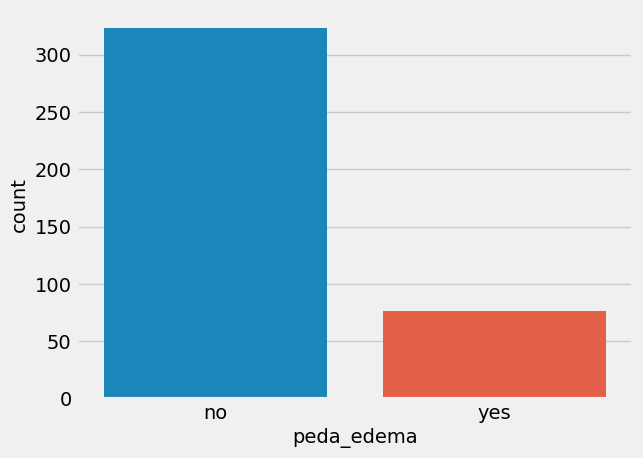

In [53]:
sns.countplot(x='peda_edema', data=df)
plt.show()

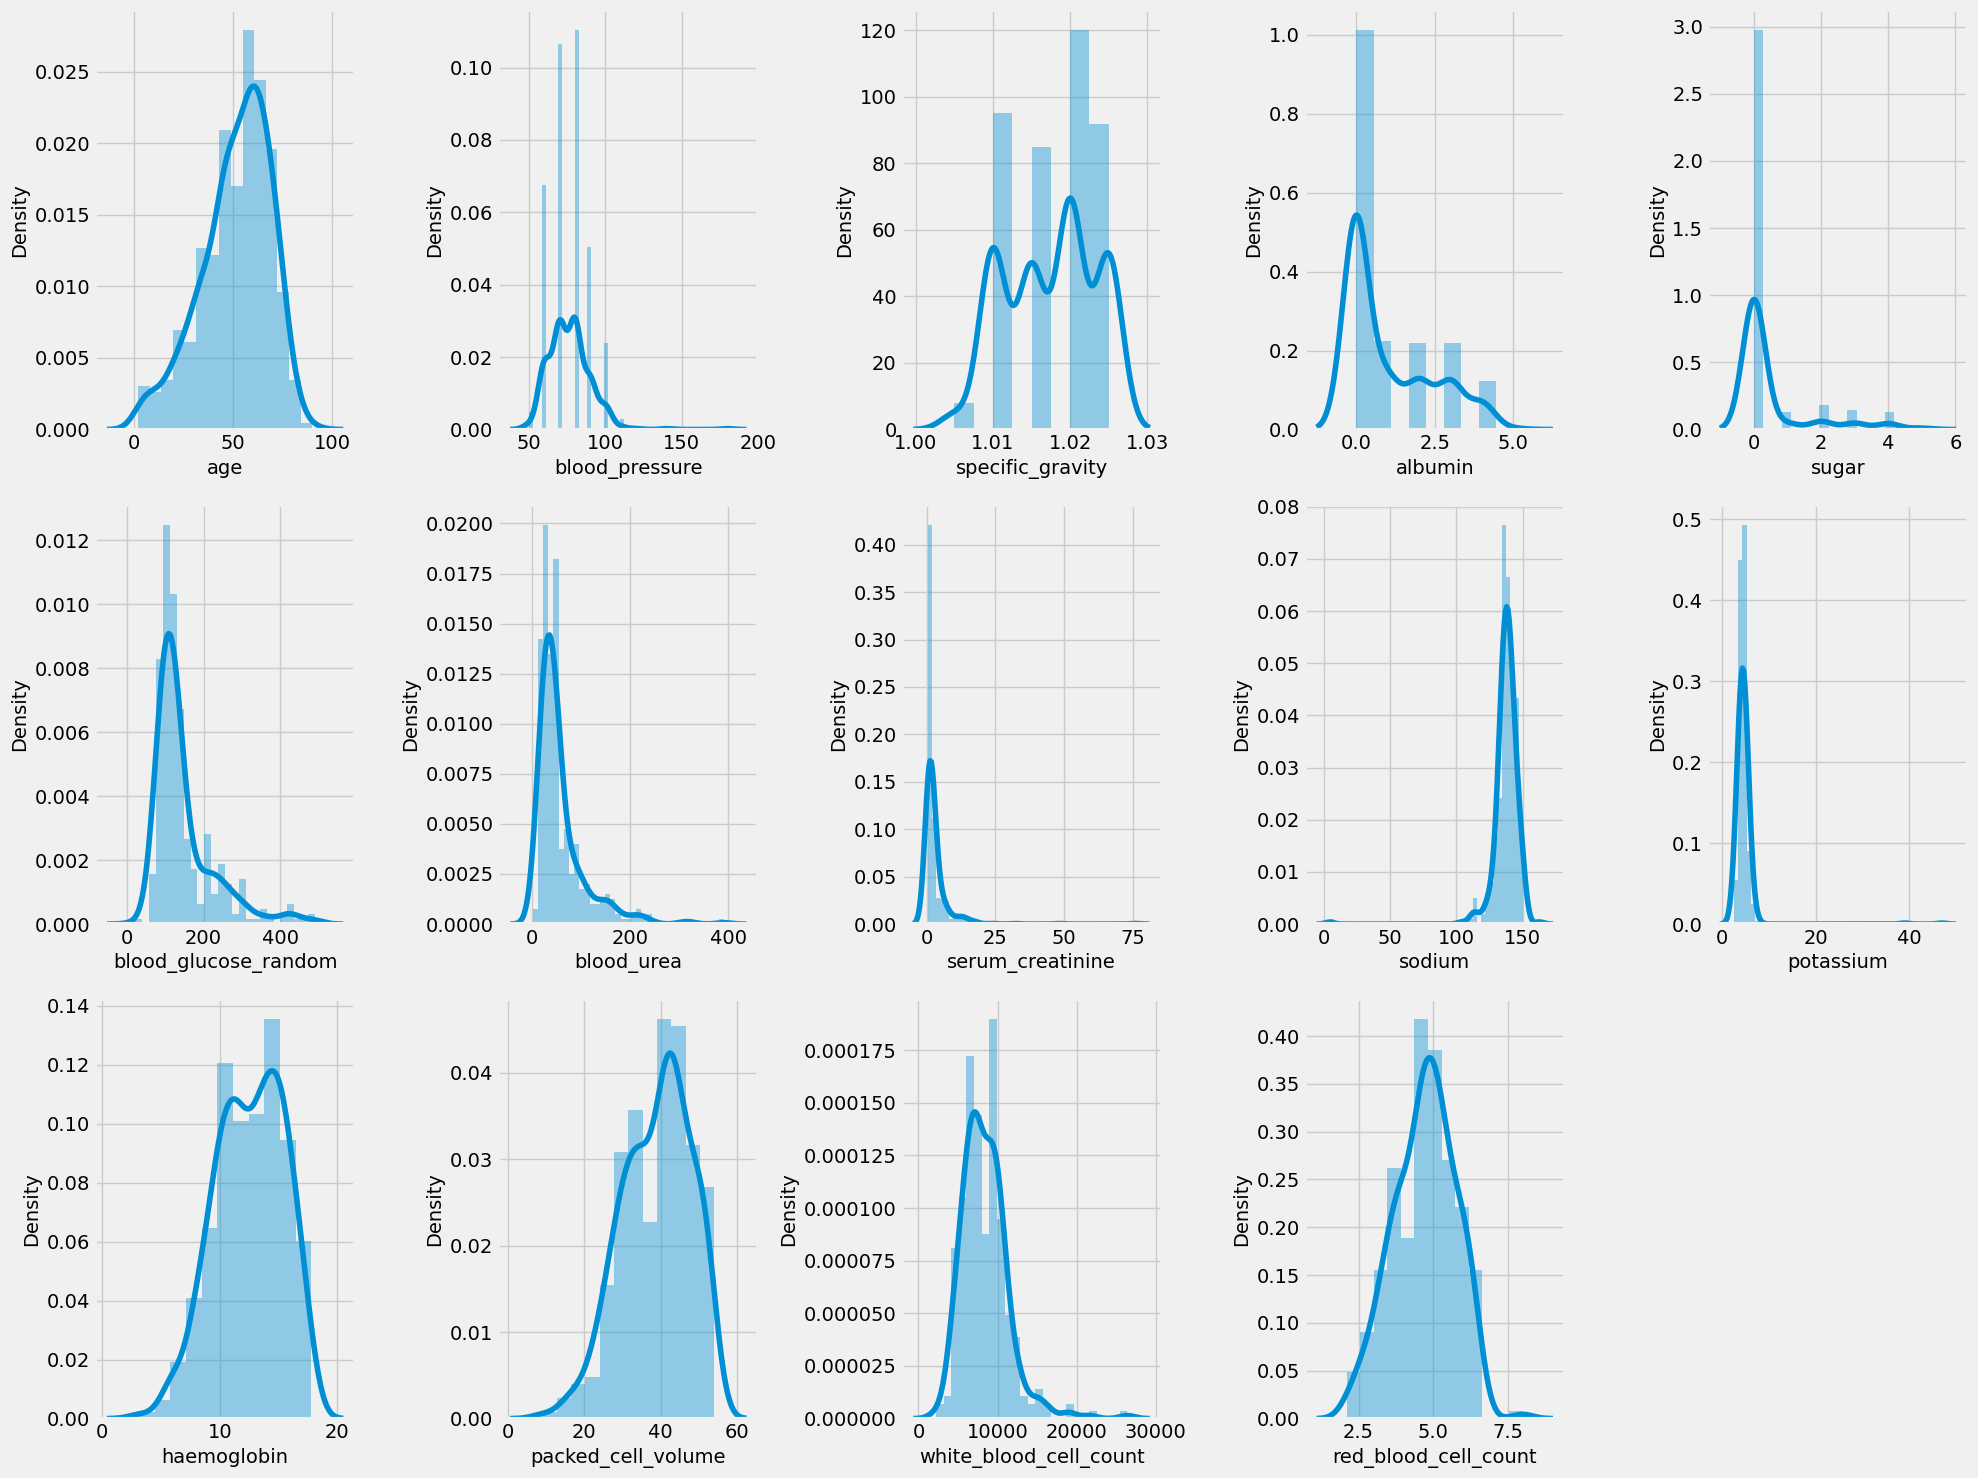

In [54]:
plt.figure(figsize=(20, 15))
plotnumber = 1

for col in num_cols:
    if plotnumber <= 15:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col)
    plotnumber += 1

plt.tight_layout()
plt.show()

In [55]:
def kde(col):
    grid = sns.FacetGrid(df, hue='class', height=6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()

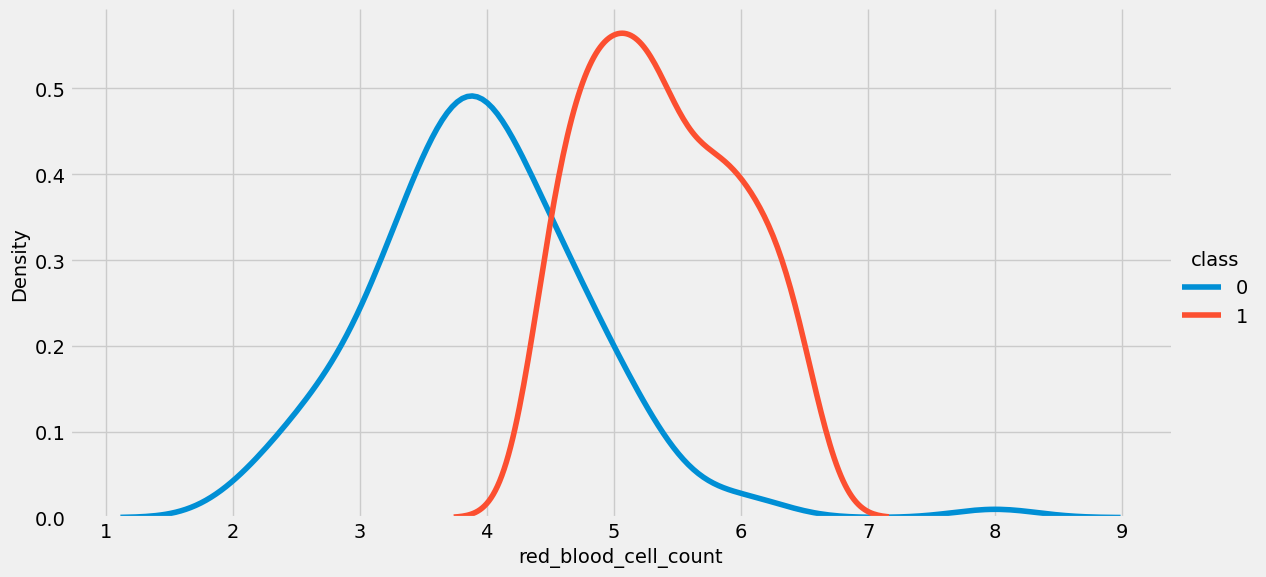

In [56]:
kde('red_blood_cell_count')

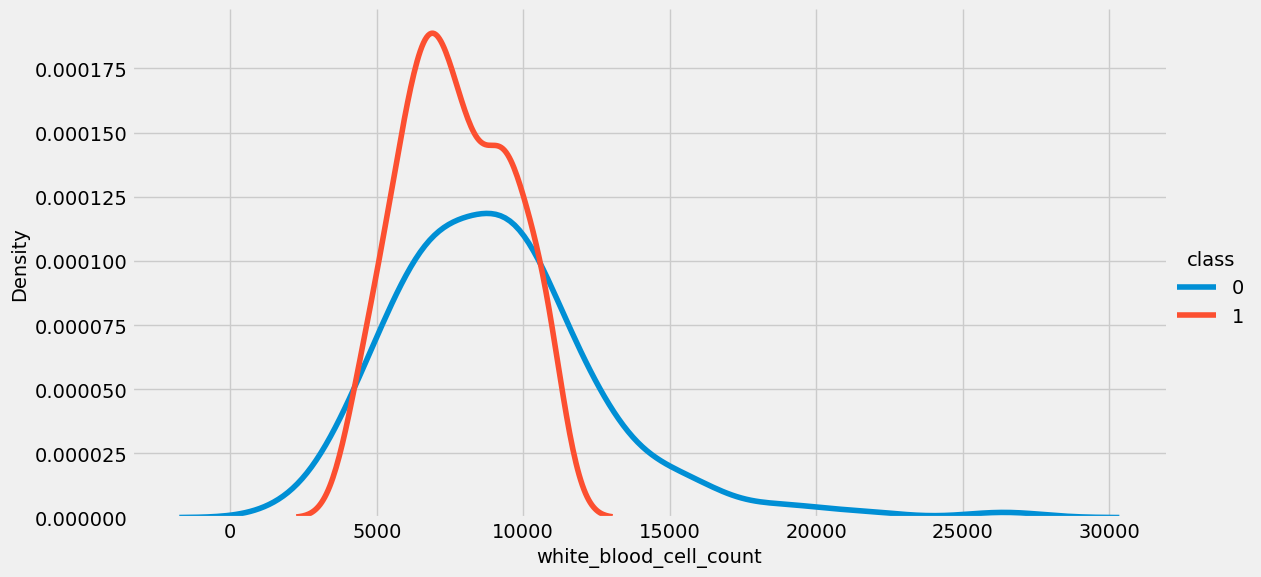

In [57]:
kde('white_blood_cell_count')

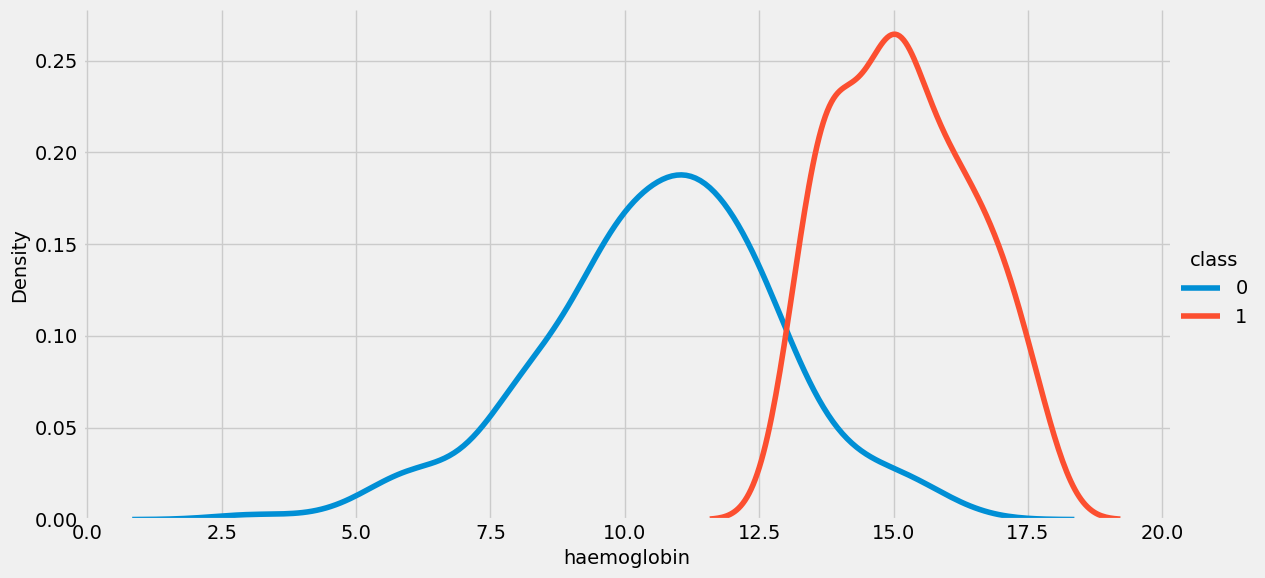

In [58]:
kde('haemoglobin')

In [59]:
def violin(col):
    fig = px.violin(df, y=col, x='class', box=True, template='plotly_dark')
    return fig.show()

In [60]:
violin('haemoglobin')

In [61]:
# Insights >> outliers are present, 3.1 and 4.8, 16.1 for class 0

violin('packed_cell_volume')

In [62]:
violin('specific_gravity')

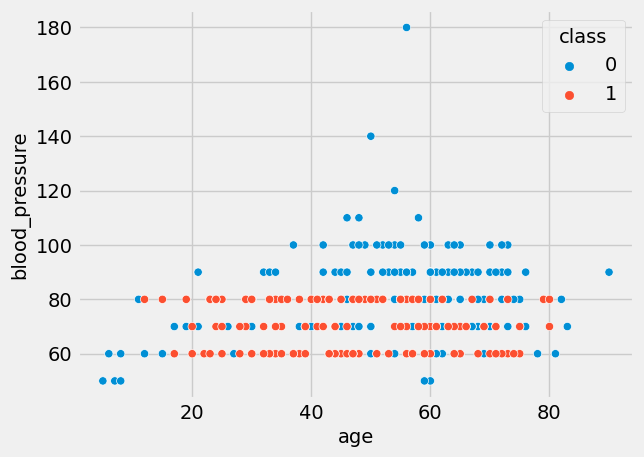

In [63]:
# Bivariate

sns.scatterplot(x='age', y='blood_pressure', data=df, hue='class')
plt.show()

In [64]:
# Insight >> high bp causes chronic disease

In [65]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

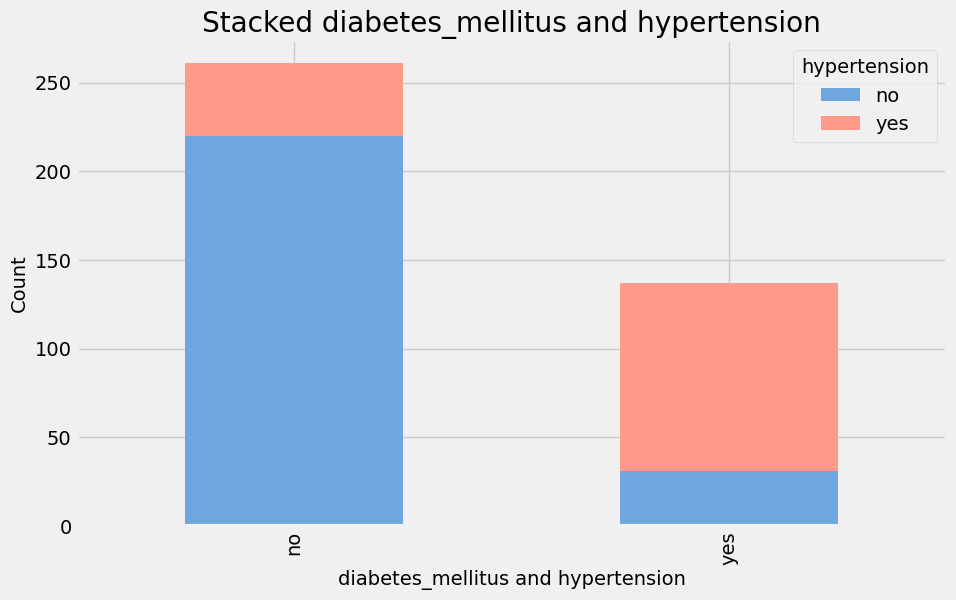

In [66]:
diabetes_hypertension = pd.crosstab(df['diabetes_mellitus'], df['hypertension'])
diabetes_hypertension.plot(kind='bar', stacked=True, color=['#6DA7DE', '#FF9A8B'], figsize=(10, 6))

plt.xlabel('diabetes_mellitus and hypertension')
plt.ylabel('Count')
plt.legend(title='hypertension')
plt.title('Stacked diabetes_mellitus and hypertension')
plt.show()

In [67]:
diabetes_hypertension

hypertension,no,yes
diabetes_mellitus,,
no,220,41
yes,31,106


In [68]:
def scatter(col1, col2):
    fig = px.scatter(df, x=col1, y=col2, color='class', template='plotly_dark')
    return fig.show()

In [69]:
scatter('haemoglobin', 'packed_cell_volume')

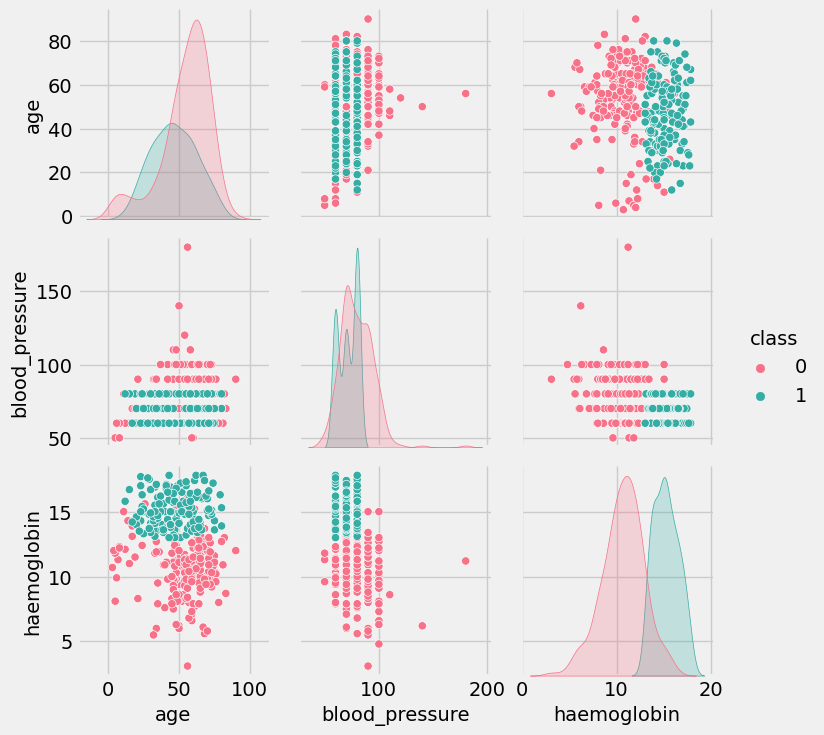

In [70]:
# Multivariable analysis

selected_columns = ['age', 'blood_pressure', 'haemoglobin', 'class']
sns.pairplot(df[selected_columns], hue='class', palette='husl')
plt.show()

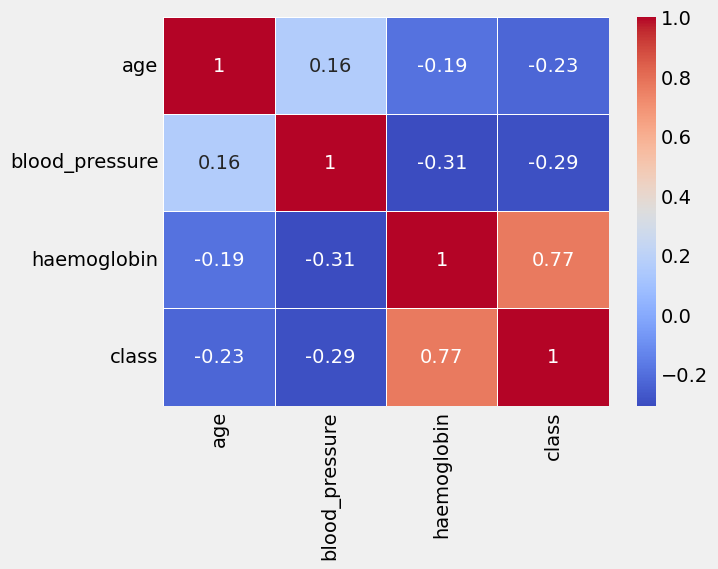

In [71]:
df[selected_columns].corr()

sns.heatmap(df[selected_columns].corr(), annot=True, cmap='coolwarm', linewidth=.5)
plt.show()

In [72]:
heatmap_data = df[selected_columns].corr()

fig = go.Figure(data=go.Heatmap(z=heatmap_data.values,
x=heatmap_data.columns,
y=heatmap_data.index,
colorscale='viridis'))

fig.update_layout(title='Interactive Heatmap of Correlation Matrix')
fig.show()

In [73]:
fig = px.scatter_3d(df, x='age', y='blood_pressure', z='serum_creatinine', color='haemoglobin',
title='3D Scatter plot with Color Gradient')

fig.show()